# Refer to SF EDA notebook for Price EDA (Section 5 & 10)

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Data

In [2]:
SF_df = pd.read_pickle("pre-processing and EDA/cleaned_listings.pkl")
SF_df.head(5)

,id,name,description,neighborhood_overview,host_id,host_name,host_since,host_location,host_about,host_response_time,...,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,reviews_per_month
0,958,"Bright, Modern Garden Unit - 1BR/1BTH",Cleaning Protocol: Our cleaners follow the Air...,Quiet cul de sac in friendly neighborhood<br /...,1169,Holly,2008-07-31,"San Francisco, California, United States",We are a family of four that live upstairs. W...,within an hour,...,2020-07-30,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,1.91
1,5858,Creative Sanctuary,<b>The space</b><br />We live in a large Victo...,I love how our neighborhood feels quiet but is...,8904,Philip And Tania,2009-03-02,"San Francisco, California, United States",Philip: English transplant to the Bay Area and...,within a day,...,2017-08-06,98.0,10.0,10.0,10.0,10.0,10.0,9.0,False,0.81
2,7918,A Friendly Room - UCSF/USF - San Francisco,Nice and good public transportation. 7 minute...,"Shopping old town, restaurants, McDonald, Whol...",21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,...,2020-03-06,84.0,7.0,8.0,9.0,9.0,9.0,8.0,False,0.14
3,8142,Friendly Room Apt. Style -UCSF/USF - San Franc...,Nice and good public transportation. 7 minute...,NaN,21994,Aaron,2009-06-17,"San Francisco, California, United States",7 minutes walk to UCSF hospital & school campu...,within a few hours,...,2018-09-12,93.0,9.0,9.0,10.0,10.0,9.0,9.0,False,0.11
4,8339,Historic Alamo Square Victorian,Pls email before booking. <br />Interior featu...,NaN,24215,Rosy,2009-07-02,"San Francisco, California, United States",I'm an Interior Stylist living in SF. \r\n\r\n...,within a few hours,...,2019-06-28,97.0,10.0,10.0,10.0,10.0,10.0,10.0,False,0.21


In [3]:
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 56 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   id                           7274 non-null   int64         
 1   name                         7274 non-null   object        
 2   description                  7220 non-null   object        
 3   neighborhood_overview        5330 non-null   object        
 4   host_id                      7274 non-null   int64         
 5   host_name                    7274 non-null   object        
 6   host_since                   7274 non-null   datetime64[ns]
 7   host_location                7269 non-null   object        
 8   host_about                   5475 non-null   object        
 9   host_response_time           5321 non-null   object        
 10  host_response_rate           5321 non-null   float64       
 11  host_acceptance_rate         6393 non-null 

# Drop columns

In [4]:
#['host_listings_count', 'accommodates', 'bathrooms', 'bedrooms', 'beds', 'price', 'number_of_reviews', 'review_scores_rating', 'reviews_per_month']

relevant_columns = ["host_response_time","host_response_rate","host_acceptance_rate","host_is_superhost",\
                   "host_listings_count","neighbourhood_cleansed","property_type","room_type",\
                   "accommodates","bathrooms","bedrooms","beds","amenities","price","minimum_nights","maximum_nights",\
                   "number_of_reviews","review_scores_rating","reviews_per_month"]
# print(len(relevant_columns))

for column in SF_df.columns:
    if column not in relevant_columns:
        SF_df.drop(column, axis=1,inplace=True)
SF_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7274 entries, 0 to 7273
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   host_response_time      5321 non-null   object 
 1   host_response_rate      5321 non-null   float64
 2   host_acceptance_rate    6393 non-null   float64
 3   host_is_superhost       7274 non-null   bool   
 4   host_listings_count     7274 non-null   int64  
 5   neighbourhood_cleansed  7274 non-null   object 
 6   property_type           7274 non-null   object 
 7   room_type               7274 non-null   object 
 8   accommodates            7274 non-null   int64  
 9   bathrooms               7274 non-null   float64
 10  bedrooms                7274 non-null   float64
 11  beds                    7274 non-null   float64
 12  amenities               7274 non-null   object 
 13  price                   7274 non-null   float64
 14  minimum_nights          7274 non-null   

# Different column types

In [5]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_columns = SF_df.select_dtypes(include=numerics).columns.to_list()
bool_columns = SF_df.select_dtypes(include='bool').columns.to_list()
object_columns = SF_df.select_dtypes(include='object').columns.to_list()
print(object_columns)

['host_response_time', 'neighbourhood_cleansed', 'property_type', 'room_type', 'amenities']


# Check and fill null values

In [6]:
SF_df.isnull().sum()

host_response_time        1953
host_response_rate        1953
host_acceptance_rate       881
host_is_superhost            0
host_listings_count          0
neighbourhood_cleansed       0
property_type                0
room_type                    0
accommodates                 0
bathrooms                    0
bedrooms                     0
beds                         0
amenities                    0
price                        0
minimum_nights               0
maximum_nights               0
number_of_reviews            0
review_scores_rating         0
reviews_per_month            0
dtype: int64

In [7]:
SF_df[["host_response_time","host_response_rate","host_acceptance_rate"]].head()

,host_response_time,host_response_rate,host_acceptance_rate
0,within an hour,1.0,0.99
1,within a day,0.6,0.83
2,within a few hours,1.0,1.00
3,within a few hours,1.0,1.00
4,within a few hours,1.0,0.00


In [8]:
SF_df["host_response_time"].fillna("-",inplace=True)
SF_df["host_response_rate"].fillna(0,inplace=True)
SF_df["host_acceptance_rate"].fillna(0,inplace=True)
SF_df.isnull().sum()

host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
dtype: int64

# Filter out price outliers

In [9]:
IQR_value = 625 #based on price box plot from SF EDA notebook -> 1.5*IQR value
SFprice_filtered_df = SF_df[SF_df.price <= IQR_value]
SFprice_filtered_df["price"].describe(percentiles=[0.1,0.25, 0.5, 0.75,0.9])

count    6981.000000
mean      165.410079
std       111.598382
min        10.000000
10%        60.000000
25%        85.000000
50%       135.000000
75%       205.000000
90%       313.000000
max       625.000000
Name: price, dtype: float64

In [10]:
SFprice_filtered_df.isnull().sum()

host_response_time        0
host_response_rate        0
host_acceptance_rate      0
host_is_superhost         0
host_listings_count       0
neighbourhood_cleansed    0
property_type             0
room_type                 0
accommodates              0
bathrooms                 0
bedrooms                  0
beds                      0
amenities                 0
price                     0
minimum_nights            0
maximum_nights            0
number_of_reviews         0
review_scores_rating      0
reviews_per_month         0
dtype: int64

# Correlations for Numeric Columns

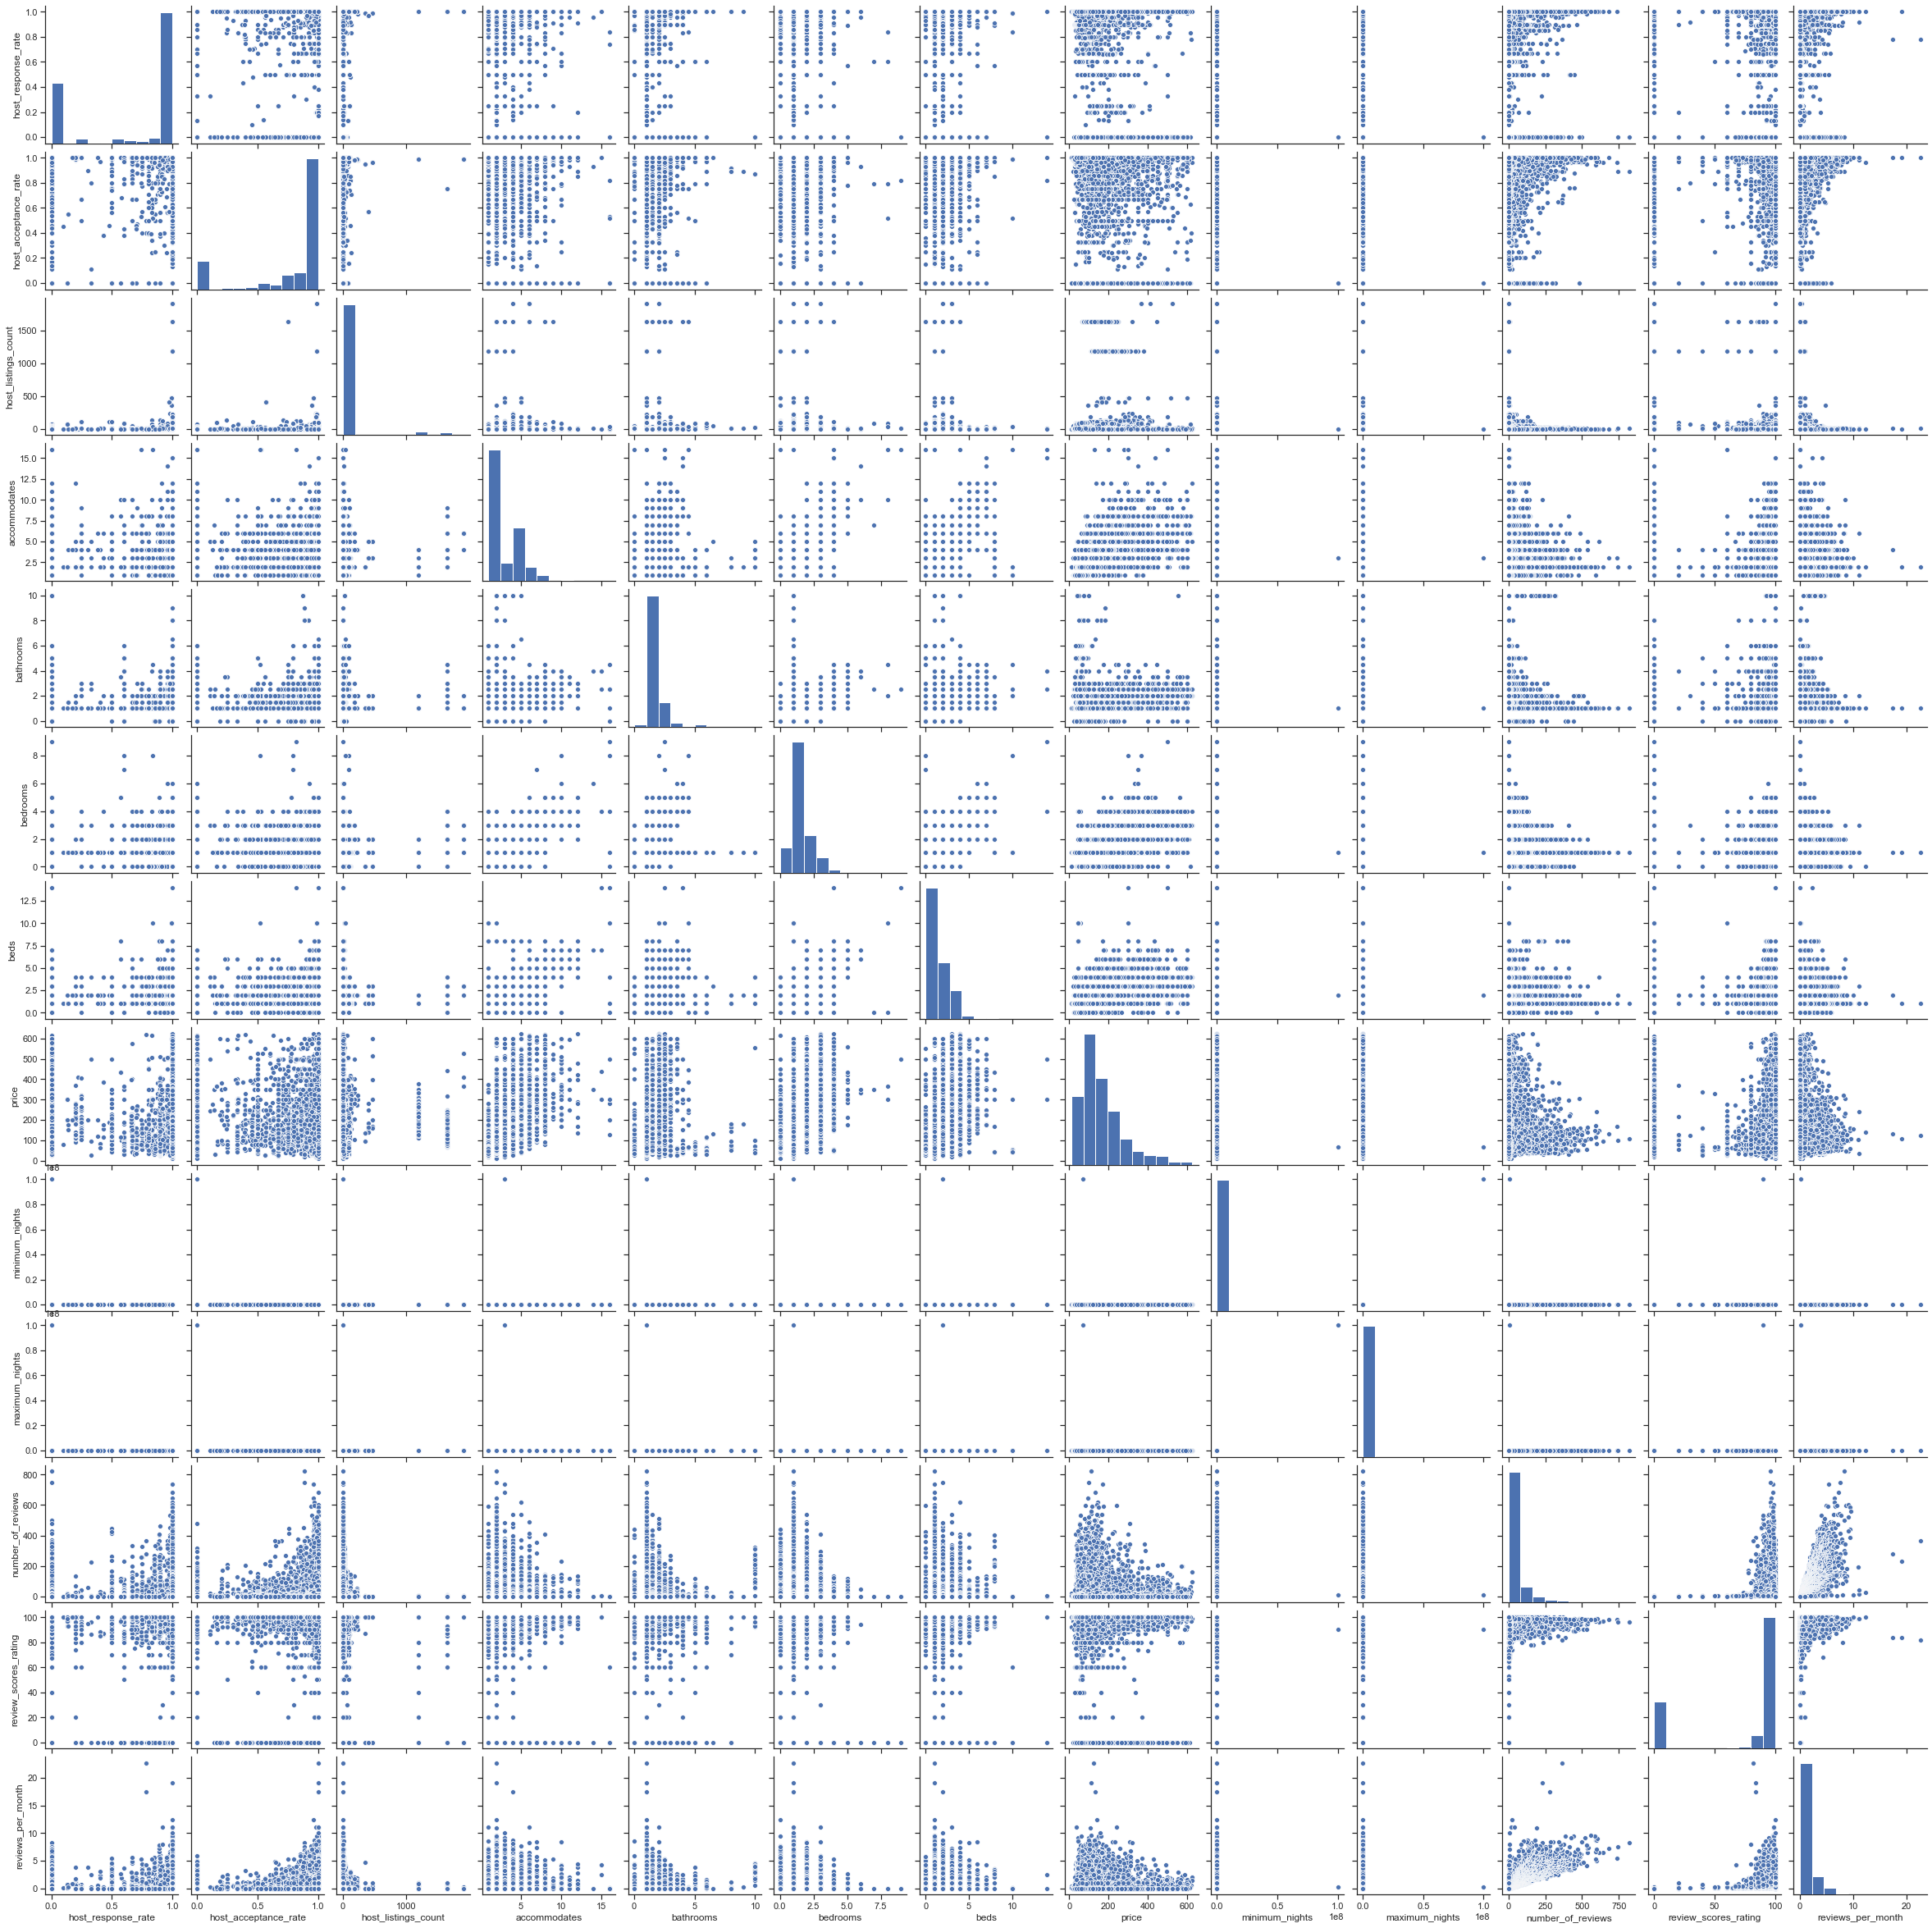

In [11]:
#sns.set(style="ticks", color_codes=True)
#sns.pairplot(SFprice_filtered_df[numeric_columns])

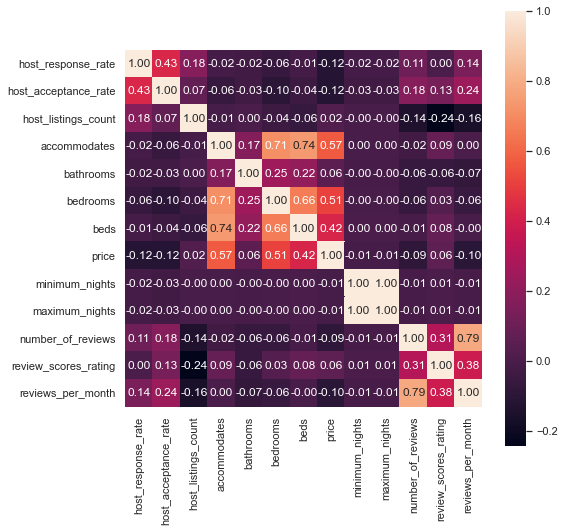

In [12]:
corr = SFprice_filtered_df[numeric_columns].corr()
plt.figure(figsize = (8,8))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True, fmt = '.2f', xticklabels=numeric_columns, yticklabels=numeric_columns)

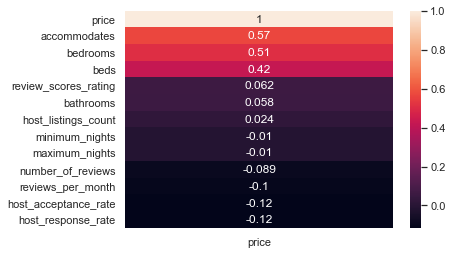

In [13]:
sns.heatmap(corr[['price']].sort_values(['price'],ascending=False),yticklabels=True,annot=True)

In [14]:
SFprice_filtered_df["host_is_superhost"]

,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_listings_count,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month
0,within an hour,1.0,0.99,True,1,Western Addition,Entire apartment,Entire home/apt,3,1.0,1.0,2.0,"[""Heating"", ""Hot water"", ""Stove"", ""Iron"", ""Dry...",132.0,2,30,257,97.0,1.91
1,within a day,0.6,0.83,False,2,Bernal Heights,Entire apartment,Entire home/apt,5,1.0,2.0,3.0,"[""Smoke alarm"", ""Heating"", ""Kitchen"", ""First a...",235.0,30,60,111,98.0,0.81
2,within a few hours,1.0,1.00,False,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,60,19,84.0,0.14
3,within a few hours,1.0,1.00,False,10,Haight Ashbury,Private room in apartment,Private room,2,4.0,1.0,1.0,"[""Host greets you"", ""Heating"", ""Hot water"", ""K...",56.0,32,90,8,93.0,0.11
5,within an hour,1.0,0.96,True,2,Mission,Private room in condominium,Private room,3,1.0,1.0,1.0,"[""Heating"", ""Hot water"", ""Children\u2019s book...",169.0,1,14,736,98.0,5.47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7269,within a few hours,1.0,1.00,False,92,Mission,Entire apartment,Entire home/apt,2,1.0,0.0,1.0,"[""Smoke alarm"", ""Long term stays allowed"", ""Re...",71.0,30,150,0,0.0,0.00
7270,within a few hours,1.0,1.00,False,92,Downtown/Civic Center,Entire apartment,Entire home/apt,2,1.0,0.0,1.0,"[""Smoke alarm"", ""Long term stays allowed"", ""Re...",62.0,30,150,0,0.0,0.00
7271,-,0.0,0.00,False,0,Lakeshore,Entire townhouse,Entire home/apt,6,3.0,3.0,0.0,"[""Gym"", ""Heating"", ""Air conditioning"", ""Iron"",...",399.0,1,180,0,0.0,0.00
7272,-,0.0,0.00,False,1,South of Market,Private room in apartment,Private room,1,1.0,0.0,1.0,"[""Gym"", ""Heating"", ""Hot water"", ""Stove"", ""Air ...",120.0,120,190,0,0.0,0.00


# Data Pre-processing for non-numeric columns

## Converting bool to numeric

In [16]:
for column in bool_columns:
    SFprice_filtered_df[column] = SFprice_filtered_df[column].replace(False,0,regex=True)
    SFprice_filtered_df[column] = SFprice_filtered_df[column].replace(True,1,regex=True)
SFprice_filtered_df["host_is_superhost"].head()

C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\User\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0    1.0
1    0.0
2    0.0
3    0.0
5    1.0
Name: host_is_superhost, dtype: float64

## Transforming amenities to numeric columns

In [23]:
SFprice_filtered_df.amenities = SFprice_filtered_df.amenities.str.replace('"', "")
SFprice_filtered_df.amenities = SFprice_filtered_df.amenities.str.replace("[", "")
SFprice_filtered_df.amenities = SFprice_filtered_df.amenities.str.replace("]", "")
SFprice_filtered_df['amenities'].head()

C:\Users\User\Anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


0    Heating, Hot water, Stove, Iron, Dryer, Coffee...
1    Smoke alarm, Heating, Kitchen, First aid kit, ...
2    Host greets you, Heating, Hot water, Kitchen, ...
3    Host greets you, Heating, Hot water, Kitchen, ...
5    Heating, Hot water, Children\u2019s books and ...
Name: amenities, dtype: object

In [39]:
from sklearn.feature_extraction.text import CountVectorizer

count_vectorizer =  CountVectorizer(tokenizer=lambda x: x.split(', '))
amenities = count_vectorizer.fit_transform(SFprice_filtered_df['amenities'])
df_amenities = pd.DataFrame(amenities.toarray(), columns=count_vectorizer.get_feature_names())
df_amenities = df_amenities.drop('',1)

In [43]:
len(df_amenities.columns.to_list())

115

In [51]:
listings_new = SFprice_filtered_df[numeric_columns+bool_columns]
listings_new.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,reviews_per_month,host_is_superhost
0,1.0,0.99,1,3,1.0,1.0,2.0,132.0,2,30,257,97.0,1.91,1.0
1,0.6,0.83,2,5,1.0,2.0,3.0,235.0,30,60,111,98.0,0.81,0.0
2,1.0,1.00,10,2,4.0,1.0,1.0,56.0,32,60,19,84.0,0.14,0.0
3,1.0,1.00,10,2,4.0,1.0,1.0,56.0,32,90,8,93.0,0.11,0.0
5,1.0,0.96,2,3,1.0,1.0,1.0,169.0,1,14,736,98.0,5.47,1.0


## Transforming categorical columns to numeric columns and creating new df

In [52]:
for categorical_col in object_columns[:-1]:
    listings_new = pd.concat([listings_new, pd.get_dummies(SFprice_filtered_df[categorical_col])], axis=1)

In [1]:
#listings_new.columns.to_list()
listings_new.info()

NameError: name 'listings_new' is not defined

In [56]:
listings_new = pd.concat([listings_new, df_amenities], axis=1, join='inner')
listings_new.head()

,host_response_rate,host_acceptance_rate,host_listings_count,accommodates,bathrooms,bedrooms,beds,price,minimum_nights,maximum_nights,...,table corner guards,terrace,tv,walk in closet,washer,waterfront,wet bar,wifi,window guards,wine cooler
0,1.0,0.99,1,3,1.0,1.0,2.0,132.0,2,30,...,0,0,1,0,1,0,0,1,0,0
1,0.6,0.83,2,5,1.0,2.0,3.0,235.0,30,60,...,0,0,0,0,1,0,0,1,0,0
2,1.0,1.00,10,2,4.0,1.0,1.0,56.0,32,60,...,0,0,1,0,1,0,0,1,0,0
3,1.0,1.00,10,2,4.0,1.0,1.0,56.0,32,90,...,0,0,1,0,1,0,0,1,0,0
5,1.0,0.96,2,3,1.0,1.0,1.0,169.0,1,14,...,0,0,1,0,1,0,0,1,0,0


In [86]:
listings_new.columns.to_list()
# listings_new.columns.duplicated()

['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'reviews_per_month',
 'host_is_superhost',
 '-',
 'a few days or more',
 'within a day',
 'within a few hours',
 'within an hour',
 'Bayview',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Crocker Amazon',
 'Diamond Heights',
 'Downtown/Civic Center',
 'Excelsior',
 'Financial District',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Inner Richmond',
 'Inner Sunset',
 'Lakeshore',
 'Marina',
 'Mission',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Ocean View',
 'Outer Mission',
 'Outer Richmond',
 'Outer Sunset',
 'Pacific Heights',
 'Parkside',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Treasure Island/YBI',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition'

In [87]:
# rename duplicate column
listings_new.columns = \
['host_response_rate',
 'host_acceptance_rate',
 'host_listings_count',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'price',
 'minimum_nights',
 'maximum_nights',
 'number_of_reviews',
 'review_scores_rating',
 'reviews_per_month',
 'host_is_superhost',
 '-',
 'a few days or more',
 'within a day',
 'within a few hours',
 'within an hour',
 'Bayview',
 'Bernal Heights',
 'Castro/Upper Market',
 'Chinatown',
 'Crocker Amazon',
 'Diamond Heights',
 'Downtown/Civic Center',
 'Excelsior',
 'Financial District',
 'Glen Park',
 'Golden Gate Park',
 'Haight Ashbury',
 'Inner Richmond',
 'Inner Sunset',
 'Lakeshore',
 'Marina',
 'Mission',
 'Nob Hill',
 'Noe Valley',
 'North Beach',
 'Ocean View',
 'Outer Mission',
 'Outer Richmond',
 'Outer Sunset',
 'Pacific Heights',
 'Parkside',
 'Potrero Hill',
 'Presidio',
 'Presidio Heights',
 'Russian Hill',
 'Seacliff',
 'South of Market',
 'Treasure Island/YBI',
 'Twin Peaks',
 'Visitacion Valley',
 'West of Twin Peaks',
 'Western Addition',
 'Boat',
 'Casa particular',
 'Earth house',
 'Entire apartment',
 'Entire bungalow',
 'Entire cabin',
 'Entire condominium',
 'Entire cottage',
 'Entire floor',
 'Entire guest suite',
 'Entire guesthouse',
 'Entire house',
 'Entire in-law',
 'Entire loft',
 'Entire place',
 'Entire serviced apartment',
 'Entire townhouse',
 'Entire villa',
 'Private room (Property Type)',
 'Private room in apartment',
 'Private room in bed and breakfast',
 'Private room in bungalow',
 'Private room in cabin',
 'Private room in castle',
 'Private room in condominium',
 'Private room in cottage',
 'Private room in earth house',
 'Private room in guest suite',
 'Private room in guesthouse',
 'Private room in hostel',
 'Private room in house',
 'Private room in hut',
 'Private room in loft',
 'Private room in resort',
 'Private room in serviced apartment',
 'Private room in townhouse',
 'Private room in villa',
 'Room in aparthotel',
 'Room in bed and breakfast',
 'Room in boutique hotel',
 'Room in hostel',
 'Room in hotel',
 'Room in serviced apartment',
 'Shared room in apartment',
 'Shared room in bed and breakfast',
 'Shared room in boutique hotel',
 'Shared room in bungalow',
 'Shared room in condominium',
 'Shared room in hostel',
 'Shared room in house',
 'Shared room in loft',
 'Shared room in townhouse',
 'Shared room in villa',
 'Tiny house',
 'Entire home/apt',
 'Hotel room',
 'Private room',
 'Shared room',
 'air conditioning',
 'alarm system',
 'baby bath',
 'baby monitor',
 'babysitter recommendations',
 'baking sheet',
 'barbecue utensils',
 'bathroom essentials',
 'bathtub',
 'bbq grill',
 'beach essentials',
 'beachfront',
 'bed linens',
 'bedroom comforts',
 'bread maker',
 'breakfast',
 'breakfast bar',
 'building staff',
 'cable tv',
 'carbon monoxide alarm',
 'changing table',
 'children\\u2019s books and toys',
 'children\\u2019s dinnerware',
 'cleaning before checkout',
 'coffee maker',
 'cooking basics',
 'crib',
 'desk',
 'dishes and silverware',
 'dishwasher',
 'dryer',
 'dual vanity',
 'elevator',
 'essentials',
 'ethernet connection',
 'ev charger',
 'extra pillows and blankets',
 'fire extinguisher',
 'fireplace guards',
 'first aid kit',
 'free parking on premises',
 'free street parking',
 'full kitchen',
 'game console',
 'garden or backyard',
 'gas fireplace',
 'gym',
 'hair dryer',
 'hangers',
 'heating',
 'high chair',
 'host greets you',
 'hot tub',
 'hot water',
 'indoor fireplace',
 'iron',
 'ironing board',
 'jetted tub',
 'keypad',
 'kitchen',
 'kitchenette',
 'lake access',
 'laptop-friendly workspace',
 'lock on bedroom door',
 'lockbox',
 'long term stays allowed',
 'luggage dropoff allowed',
 'microwave',
 'mini fridge',
 'natural gas barbeque',
 'office',
 'outlet covers',
 'oven',
 'pack \\u2019n play/travel crib',
 'paid parking off premises',
 'paid parking on premises',
 'patio or balcony',
 'pets allowed',
 'piano',
 'pocket wifi',
 'pool',
 'portable air conditioning',
 'private entrance',
 'private hot tub',
 'private living room',
 'refrigerator',
 'room-darkening shades',
 'security cameras',
 'self check-in',
 'shampoo',
 'shared hot tub',
 'shower gel',
 'single level home',
 'ski-in/ski-out',
 'smart home technology',
 'smart lock',
 'smart tv',
 'smoke alarm',
 'smoking allowed',
 'sonos sound system',
 'stair gates',
 'stand alone bathtub',
 'stand alone rain shower',
 'stove',
 'suitable for events',
 'table corner guards',
 'terrace',
 'tv',
 'walk in closet',
 'washer',
 'waterfront',
 'wet bar',
 'wifi',
 'window guards',
 'wine cooler']


# Random Forest

## Train/Test w Random Forest Algorithm

In [91]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.ensemble import RandomForestRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
rf = RandomForestRegressor(n_estimators=500, 
                               criterion='mse', 
                               random_state=3, 
                               n_jobs=-1)
rf.fit(X_train, y_train)
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)
rmse_rf= (mean_squared_error(y_test,y_test_pred))**(1/2)

print('RMSE test: %.3f' % rmse_rf)
print('R^2 test: %.3f' % (r2_score(y_test, y_test_pred)))

RMSE test: 74.181
R^2 test: 0.575


## Feature Importance of Random Forest Algorithm

In [92]:
coefs_df = pd.DataFrame()
coefs_df['est_int'] = X_train.columns
coefs_df['coefs'] = rf.feature_importances_
coefs_df.sort_values('coefs', ascending=False).head(20)

,est_int,coefs
5,bedrooms,0.297191
7,minimum_nights,0.082429
11,reviews_per_month,0.072972
3,accommodates,0.068542
2,host_listings_count,0.041142
4,bathrooms,0.033288
8,maximum_nights,0.026956
1,host_acceptance_rate,0.025513
109,Entire home/apt,0.024813
9,number_of_reviews,0.023860


# LightGBM

## Train/Test w LightGBM

In [88]:
from lightgbm import LGBMRegressor

y = listings_new['price']
x = listings_new.drop('price', axis =1)
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state=1)
fit_params={
    "early_stopping_rounds":20, 
            "eval_metric" : 'rmse', 
            "eval_set" : [(X_test,y_test)],
            'eval_names': ['valid'],
            'verbose': 100,
            'feature_name': 'auto', 
            'categorical_feature': 'auto'
           }
        
class LGBMRegressor_GainFE(LGBMRegressor):
    @property
    def feature_importances_(self):
        if self._n_features is None:
            raise LGBMNotFittedError('No feature_importances found. Need to call fit beforehand.')
        return self.booster_.feature_importance(importance_type='gain')
        
clf = LGBMRegressor_GainFE(num_leaves= 25, max_depth=20, 
                         random_state=0, 
                         silent=True, 
                         metric='rmse', 
                         n_jobs=4, 
                         n_estimators=1000,
                         colsample_bytree=0.9,
                         subsample=0.9,
                         learning_rate=0.01)
clf.fit(X_train.values, y_train.values, **fit_params)
y_pred = clf.predict(X_test.values)
print('R^2 test: %.3f' % (r2_score(y_test, y_pred)))

Training until validation scores don't improve for 20 rounds
[100]	valid's rmse: 84.1398
[200]	valid's rmse: 76.9148
[300]	valid's rmse: 74.3921
[400]	valid's rmse: 73.1719
[500]	valid's rmse: 72.6237
[600]	valid's rmse: 72.3471
Early stopping, best iteration is:
[645]	valid's rmse: 72.2773
R^2 test: 0.596


## Feature Importance of LightGBM

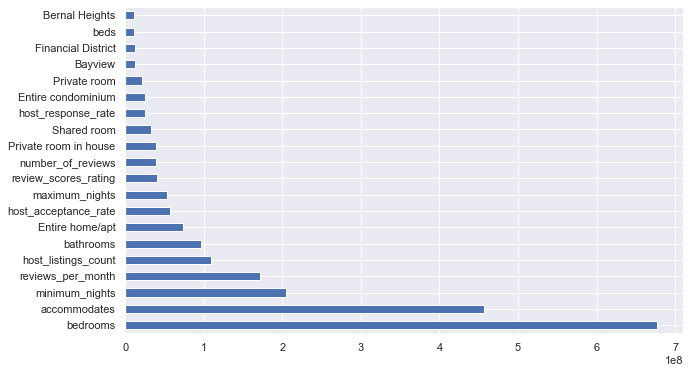

In [90]:
feat_imp = pd.Series(clf.feature_importances_, index=x.columns)
feat_imp.nlargest(20).plot(kind='barh', figsize=(10,6))